## N and f effect in tracer transport along several cross-sections 

Transports across several cross sections in the domain (See plot further down)

Advective tracer transport $\Phi_{Tadv}=C\vec{u}\cdot\vec{a}$ from model output diagnostics.

Diffusive tracer transport $\Phi_{Tdiff}$ from model output (Includes diffusion due to advection scheme)

| variable  | dims | units | description |
|:---------:|:---------:|:---------:|:---------:|
| UTRAC01   |   (T, Zmd000090, Y, Xp1) | Mol/L.m/s | Zonal Mass-Weighted Transp of Tr1 |
| VTRAC01   |   (T, Zmd000090, Yp1, X) | Mol/L.m/s | Meridional Mass-Weighted Transp of Tr1 |
| WTRAC01   |   (T, Zmd000090, Y, X)   | Mol/L.m/s | Vertical Mass-Weighted Transp of Tr1 |  
| ADVrTr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Zonal Advective Flux of Tr1 |
| ADVxTr01  |   (T, Zmd000090, Y, Xp1) | Mol/L.m^3/s| Meridional Advective Flux of Tr1 |
| ADVyTr01  |   (T, Zmd000090, Yp1, X) | Mol/L.m^3/s| Vertical Advective Flux of Tr1 |
| DFrETr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Explicit part) |
| DFrITr01  |   (T, Zld000090, Y, X)   | Mol/L.m^3/s| Vertical Diffusive Flux of Tr1 (Implicit part) |
| DFxETr01  |   (T, Zmd000090, Y, Xp1) | Mol/L.m^3/s| Zonal Diffusive Flux of Tr1 |
| DFyETr01  |   (T, Zmd000090, Yp1, X) | Mol/L.m^3/s| Meridional Diffusive Flux of Tr1 |


In [1]:
import datetime as dtm      # Python's standard date and time library
import dateutil as dutil    # Powerful datetime extensions
import glob
from math import *
from matplotlib.dates import num2date
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import xarray as xr


In [2]:
def calc_trac_transport_CS(flux_component, x_slice, y_slice, dim_name):
    '''
    INPUT:
    flux_component: xarray, flux component perpendicular to cross section (e.g. unstagger_xarray(flux51.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    dim_name: str, name of the dimension along which to sum.
    
    '''
    return (flux_component.isel(Yp1=y_slice, X=x_slice)).sum(dim=dim_name)

def calc_trac_transport_AS(flux_component, x_slice, y_slice, dim_name):
    '''
    INPUT:
    flux_component: xarray, Flux component perpendicular to cross section (e.g. unstagger_xarray(flux51.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    dim_name: str, name of the dimension along which to sum.
    
    '''
    return (flux_component.isel(Y=y_slice, Xp1=x_slice)).sum(dim=dim_name)
   

def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty

def fig_looks(ax, title = 'Cross-shelf transport'):
    '''define aesthetics of transport plots'''
    sns.set_style(style='whitegrid')
    sns.set_context('talk')

    ax.set_ylabel('tracer transport [$Mol/l.m^3s^{-1}$]')
    ax.set_xlabel('Time [$s$]')
    ax.legend(loc=0)
    ax.set_title(title)
    
    return(ax)
    

In [3]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
flux_file38 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
flux_file44 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run44/FluxTR01Glob.nc'
flux_file46 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run46/FluxTR01Glob.nc'
#flux_file51 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run51/FluxTR01Glob.nc'
flux_file52 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run52/FluxTR01Glob.nc'

gridNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc'
flux_file42 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'
flux_file47 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run47/FluxTR01Glob.nc'
flux_file49 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run49/FluxTR01Glob.nc'
#flux_file53 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run53/FluxTR01Glob.nc'
flux_file54 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run54/FluxTR01Glob.nc'

grid = xr.open_dataset(grid_file)
flux38 = xr.open_dataset(flux_file38)
flux44 = xr.open_dataset(flux_file44)
flux46 = xr.open_dataset(flux_file46)
#flux51 = xr.open_dataset(flux_file51)
flux52 = xr.open_dataset(flux_file52)

gridNoC = xr.open_dataset(gridNoC_file)
flux42 = xr.open_dataset(flux_file42)
flux47 = xr.open_dataset(flux_file47)
flux49 = xr.open_dataset(flux_file49)
#flux53 = xr.open_dataset(flux_file53)
flux54 = xr.open_dataset(flux_file54)


### Cross-sections

In [4]:
CS1_x_slice = slice(0, 59)
CS2_x_slice = slice(60, 149)
CS3_x_slice = slice(150, 224)
CS4_x_slice = slice(225, 299)
CS5_x_slice = slice(300, 359)

CS1_y_ind = 227
CS1b_y_ind = 267
CS1c_y_ind = 297
CS1d_y_ind = 359

AS1_y_slice = slice(227, 266)
AS2_y_slice = slice(267, 298)
AS3_y_slice = slice(269, 359)

AS1_x_ind = 59
AS1b_x_ind = 149
AS1c_x_ind = 224
AS1d_x_ind = 299

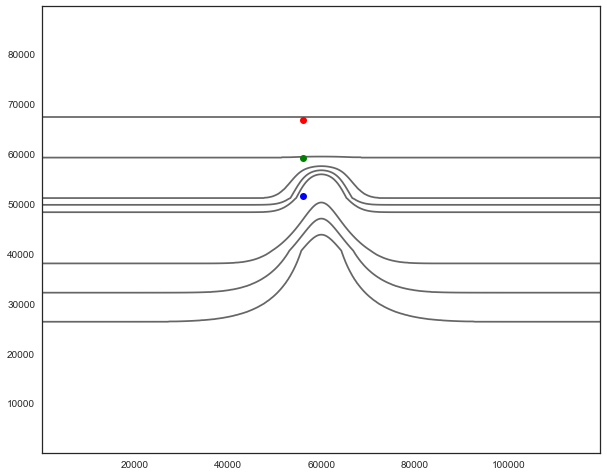

In [5]:
sns.set_style(style='white')
fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.contour(grid.X,grid.Y,grid.Depth,[50,100,150,200,250,600,800,1000], colors='0.4')
ax.plot(grid.X[150],grid.Y[227], 'bo')
ax.plot(grid.X[150],grid.Y[267], 'go')
ax.plot(grid.X[150],grid.Y[297], 'ro')

In [6]:
advCS1_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

#advCS1_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#advCS2_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#advCS3_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#advCS4_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#advCS5_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

In [7]:
advCS1_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

#advCS1_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#advCS2_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#advCS3_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#advCS4_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#advCS5_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

advCS1_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.ADVyTr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS2_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.ADVyTr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS3_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.ADVyTr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS4_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.ADVyTr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
advCS5_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.ADVyTr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

In [19]:
difCS1_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')


difCS1_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

#difCS1_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#difCS2_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#difCS3_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#difCS4_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#difCS5_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

In [14]:
difCS1_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

#difCS1_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#difCS2_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#difCS3_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#difCS4_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
#difCS5_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

difCS1_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.DFyETr01,'Yp1'), CS1_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS2_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.DFyETr01,'Yp1'), CS2_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS3_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.DFyETr01,'Yp1'), CS3_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS4_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.DFyETr01,'Yp1'), CS4_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')
difCS5_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.DFyETr01,'Yp1'), CS5_x_slice, CS1_y_ind, 'X').sum(dim='Zmd000090')

### Cross-shelf sections

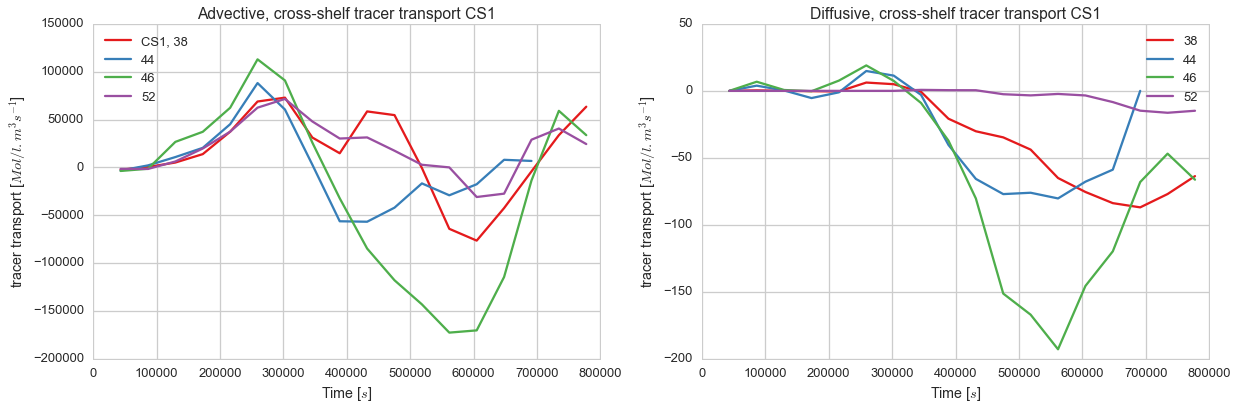

In [20]:
sns.set_palette('Set1')
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux38).plot(ax=ax[0], label = 'CS1, 38')
(advCS1_flux44).plot(ax=ax[0], label = '44')
(advCS1_flux46).plot(ax=ax[0], label = '46')
(advCS1_flux52).plot(ax=ax[0], label = '52') 


(difCS1_flux38).plot(ax=ax[1], label = '38')
(difCS1_flux44).plot(ax=ax[1], label = '44')
(difCS1_flux46).plot(ax=ax[1], label = '46')
(difCS1_flux52).plot(ax=ax[1], label = '52') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS1')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS1')

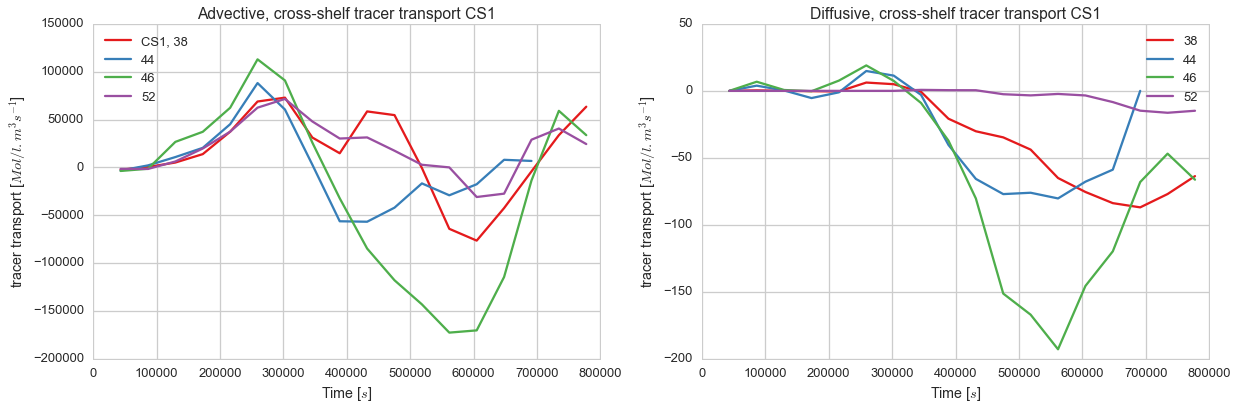

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux38).plot(ax=ax[0], label = 'CS1, 38')
(advCS1_flux44).plot(ax=ax[0], label = '44')

(advCS1_flux46).plot(ax=ax[0], label = '46')
(advCS1_flux52).plot(ax=ax[0], label = '52') 


(difCS1_flux38).plot(ax=ax[1], label = '38')
(difCS1_flux44).plot(ax=ax[1], label = '44')

(difCS1_flux46).plot(ax=ax[1], label = '46')
(difCS1_flux52).plot(ax=ax[1], label = '52') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS1')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS1')

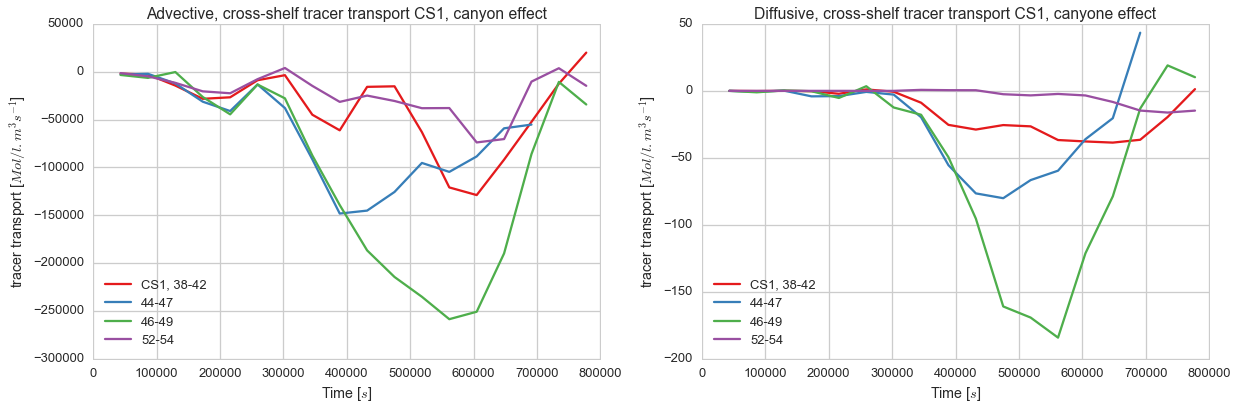

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS1_flux38-advCS1_flux42).plot(ax=ax[0], label = 'CS1, 38-42')
(advCS1_flux44-advCS1_flux47).plot(ax=ax[0], label = '44-47')

(advCS1_flux46-advCS1_flux49).plot(ax=ax[0], label = '46-49')
(advCS1_flux52-advCS1_flux54).plot(ax=ax[0], label = '52-54') 


(difCS1_flux38-difCS1_flux42).plot(ax=ax[1], label = 'CS1, 38-42')
(difCS1_flux44-difCS1_flux47).plot(ax=ax[1], label = '44-47')

(difCS1_flux46-difCS1_flux49).plot(ax=ax[1], label = '46-49')
(difCS1_flux52-difCS1_flux54).plot(ax=ax[1], label = '52-54') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS1, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS1, canyone effect')

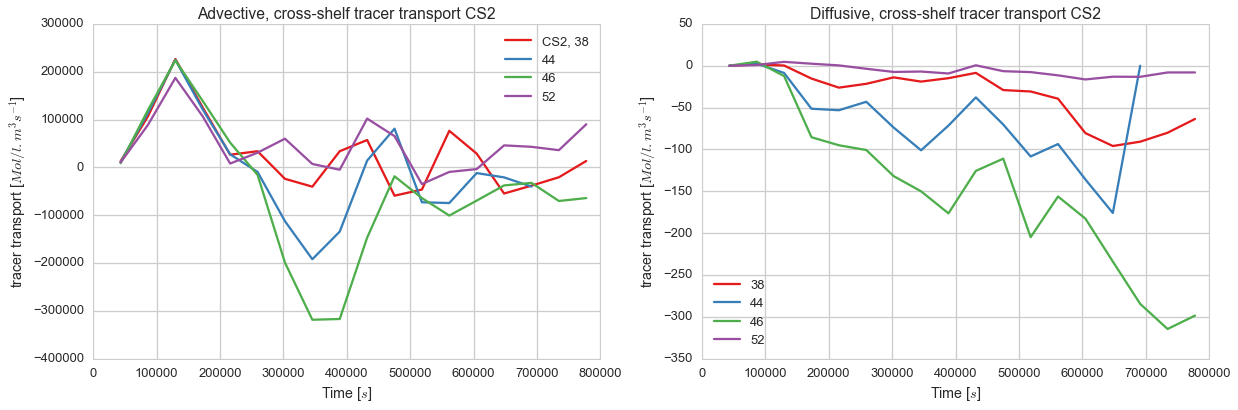

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS2_flux38).plot(ax=ax[0], label = 'CS2, 38')
(advCS2_flux44).plot(ax=ax[0], label = '44')
(advCS2_flux46).plot(ax=ax[0], label = '46')
(advCS2_flux52).plot(ax=ax[0], label = '52') 


(difCS2_flux38).plot(ax=ax[1], label = '38')
(difCS2_flux44).plot(ax=ax[1], label = '44')
(difCS2_flux46).plot(ax=ax[1], label = '46')
(difCS2_flux52).plot(ax=ax[1], label = '52') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS2')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS2')

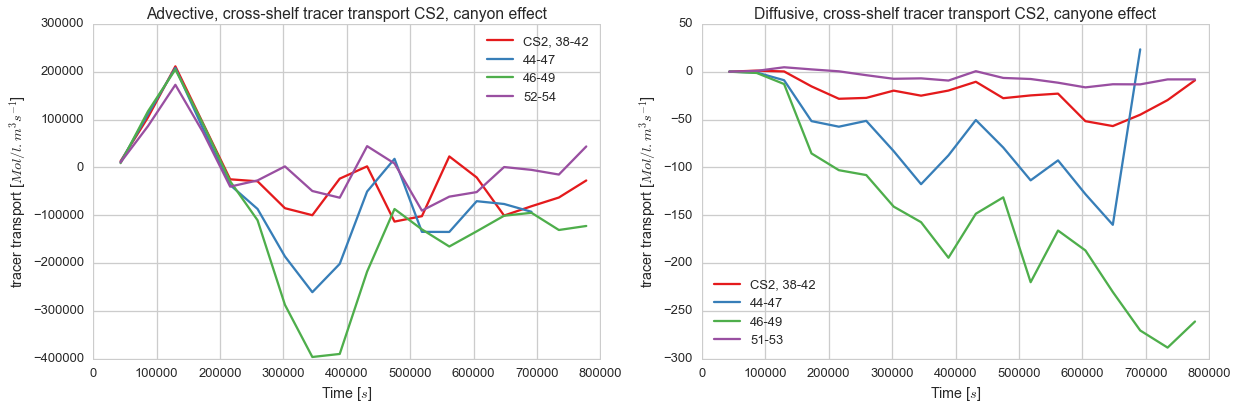

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS2_flux38-advCS2_flux42).plot(ax=ax[0], label = 'CS2, 38-42')
(advCS2_flux44-advCS2_flux47).plot(ax=ax[0], label = '44-47')
(advCS2_flux46-advCS2_flux49).plot(ax=ax[0], label = '46-49')
(advCS2_flux52-advCS2_flux54).plot(ax=ax[0], label = '52-54') 


(difCS2_flux38-difCS2_flux42).plot(ax=ax[1], label = 'CS2, 38-42')
(difCS2_flux44-difCS2_flux47).plot(ax=ax[1], label = '44-47')
(difCS2_flux46-difCS2_flux49).plot(ax=ax[1], label = '46-49')
(difCS2_flux52-difCS2_flux54).plot(ax=ax[1], label = '51-53') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS2, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS2, canyone effect')

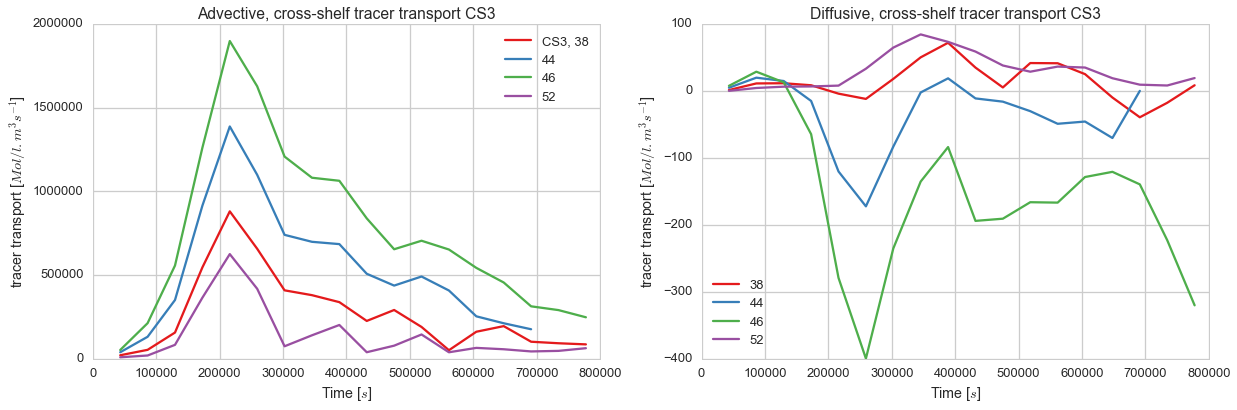

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS3_flux38).plot(ax=ax[0], label = 'CS3, 38')
(advCS3_flux44).plot(ax=ax[0], label = '44')
(advCS3_flux46).plot(ax=ax[0], label = '46')
(advCS3_flux52).plot(ax=ax[0], label = '52') 


(difCS3_flux38).plot(ax=ax[1], label = '38')
(difCS3_flux44).plot(ax=ax[1], label = '44')
(difCS3_flux46).plot(ax=ax[1], label = '46')
(difCS3_flux52).plot(ax=ax[1], label = '52') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS3')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS3')

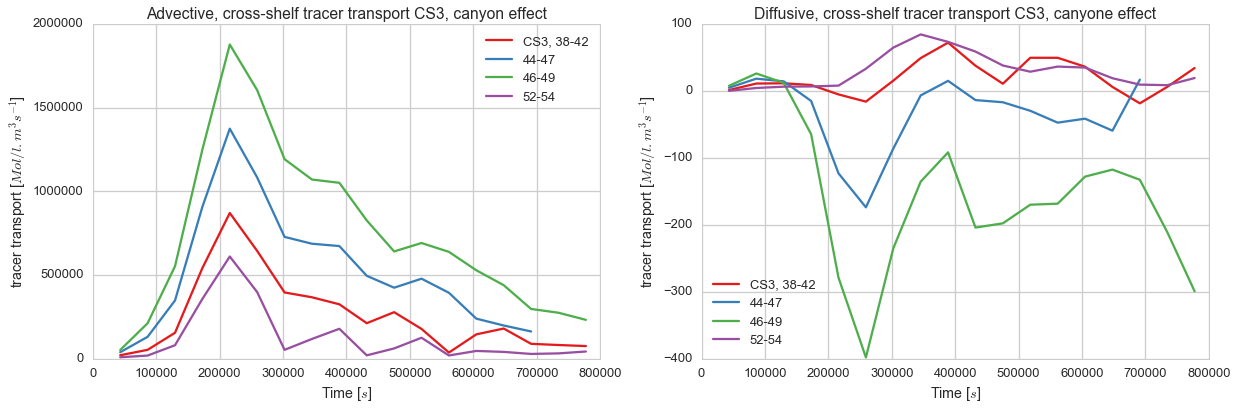

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS3_flux38-advCS3_flux42).plot(ax=ax[0], label = 'CS3, 38-42')
(advCS3_flux44-advCS3_flux47).plot(ax=ax[0], label = '44-47')
(advCS3_flux46-advCS3_flux49).plot(ax=ax[0], label = '46-49')
(advCS3_flux52-advCS3_flux54).plot(ax=ax[0], label = '52-54') 


(difCS3_flux38-difCS3_flux42).plot(ax=ax[1], label = 'CS3, 38-42')
(difCS3_flux44-difCS3_flux47).plot(ax=ax[1], label = '44-47')
(difCS3_flux46-difCS3_flux49).plot(ax=ax[1], label = '46-49')
(difCS3_flux52-difCS3_flux54).plot(ax=ax[1], label = '52-54') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS3, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS3, canyone effect')

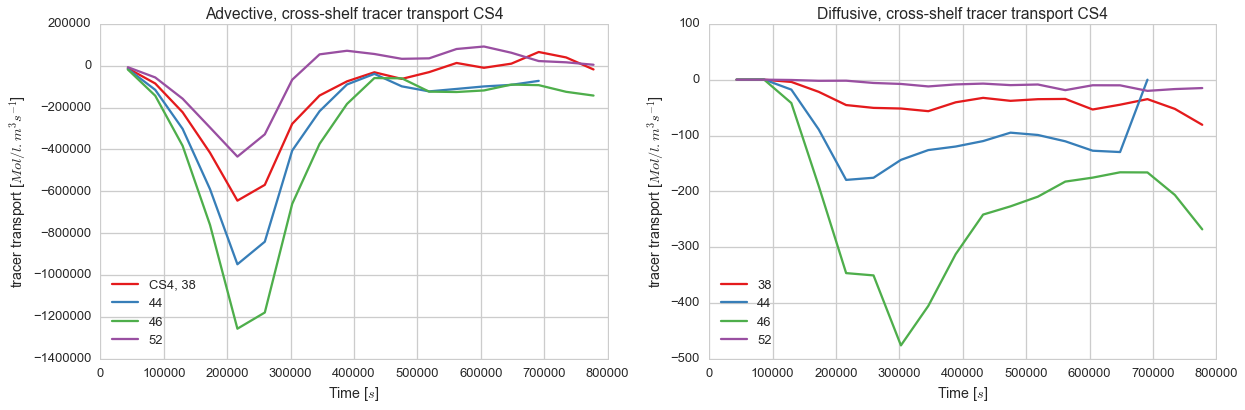

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS4_flux38).plot(ax=ax[0], label = 'CS4, 38')
(advCS4_flux44).plot(ax=ax[0], label = '44')
(advCS4_flux46).plot(ax=ax[0], label = '46')
(advCS4_flux52).plot(ax=ax[0], label = '52') 


(difCS4_flux38).plot(ax=ax[1], label = '38')
(difCS4_flux44).plot(ax=ax[1], label = '44')
(difCS4_flux46).plot(ax=ax[1], label = '46')
(difCS4_flux52).plot(ax=ax[1], label = '52') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS4')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS4')

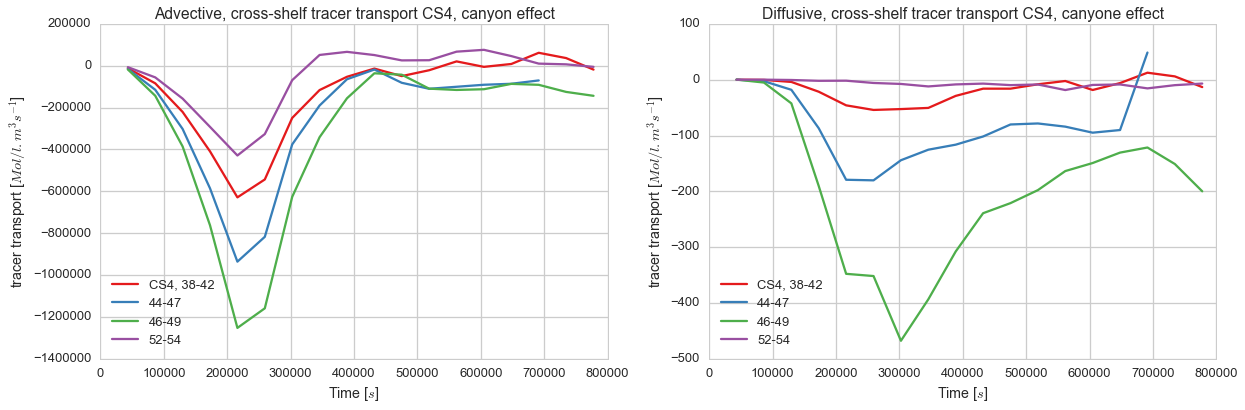

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS4_flux38-advCS4_flux42).plot(ax=ax[0], label = 'CS4, 38-42')
(advCS4_flux44-advCS4_flux47).plot(ax=ax[0], label = '44-47')
(advCS4_flux46-advCS4_flux49).plot(ax=ax[0], label = '46-49')
(advCS4_flux52-advCS4_flux54).plot(ax=ax[0], label = '52-54') 


(difCS4_flux38-difCS4_flux42).plot(ax=ax[1], label = 'CS4, 38-42')
(difCS4_flux44-difCS4_flux47).plot(ax=ax[1], label = '44-47')
(difCS4_flux46-difCS4_flux49).plot(ax=ax[1], label = '46-49')
(difCS4_flux52-difCS4_flux54).plot(ax=ax[1], label = '52-54') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS4, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS4, canyone effect')

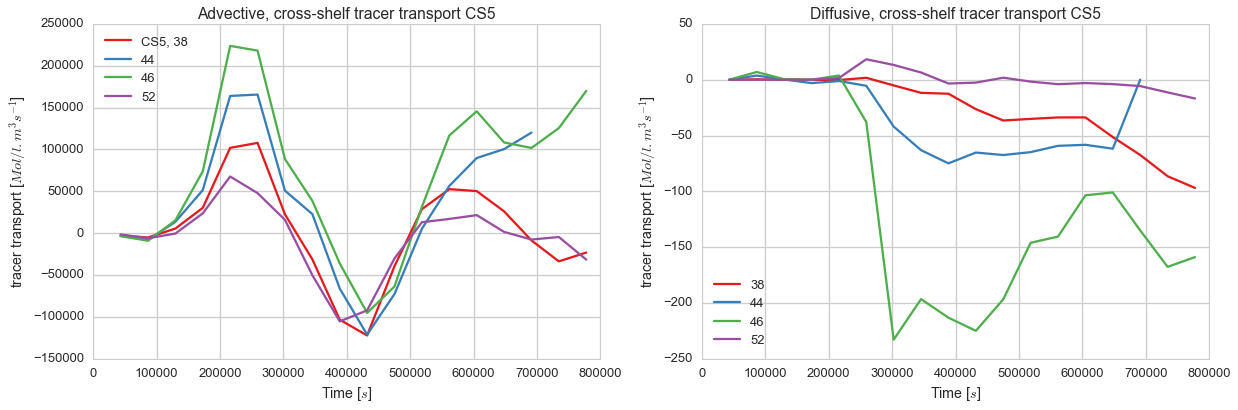

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS5_flux38).plot(ax=ax[0], label = 'CS5, 38')
(advCS5_flux44).plot(ax=ax[0], label = '44')
(advCS5_flux46).plot(ax=ax[0], label = '46')
(advCS5_flux52).plot(ax=ax[0], label = '52') 


(difCS5_flux38).plot(ax=ax[1], label = '38')
(difCS5_flux44).plot(ax=ax[1], label = '44')
(difCS5_flux46).plot(ax=ax[1], label = '46')
(difCS5_flux52).plot(ax=ax[1], label = '52') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS5')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS5')

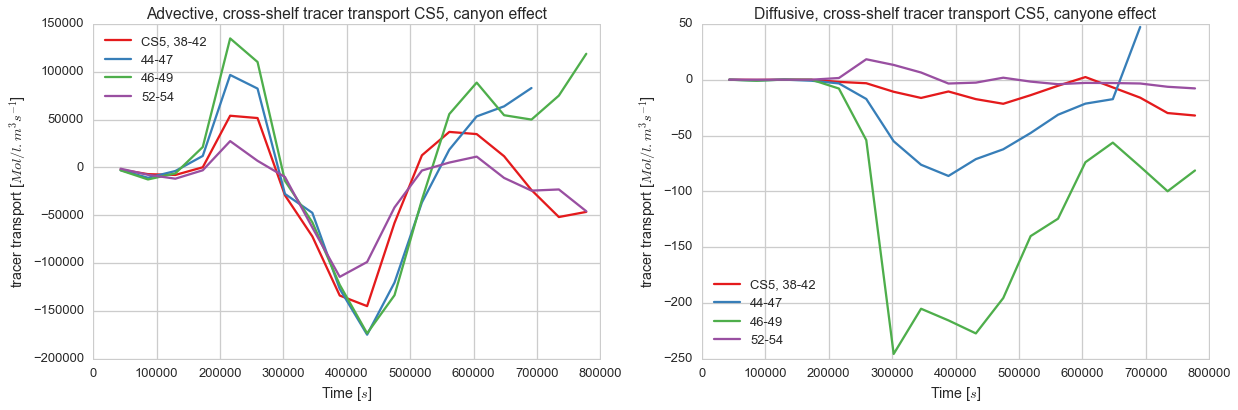

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advCS5_flux38-advCS5_flux42).plot(ax=ax[0], label = 'CS5, 38-42')
(advCS5_flux44-advCS5_flux47).plot(ax=ax[0], label = '44-47')
(advCS5_flux46-advCS5_flux49).plot(ax=ax[0], label = '46-49')
(advCS5_flux52-advCS5_flux54).plot(ax=ax[0], label = '52-54') 


(difCS5_flux38-difCS5_flux42).plot(ax=ax[1], label = 'CS5, 38-42')
(difCS5_flux44-difCS5_flux47).plot(ax=ax[1], label = '44-47')
(difCS5_flux46-difCS5_flux49).plot(ax=ax[1], label = '46-49')
(difCS5_flux52-difCS5_flux54).plot(ax=ax[1], label = '52-54') 


ax[0] = fig_looks(ax[0],title='Advective, cross-shelf tracer transport CS5, canyon effect')
ax[1] = fig_looks(ax[1],title='Diffusive, cross-shelf tracer transport CS5, canyone effect')

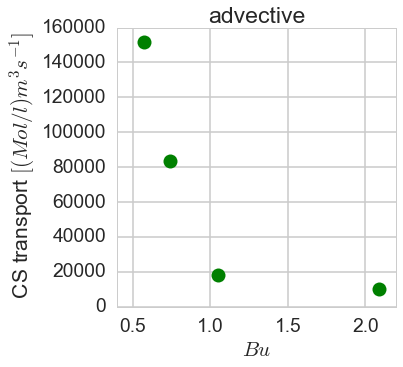

In [34]:
sns.set_context('poster',font_scale=1.2)

total38 = (advCS5_flux38 + advCS4_flux38 + advCS3_flux38 + advCS2_flux38 + advCS1_flux38-
           (advCS5_flux42 + advCS4_flux42 + advCS3_flux42 + advCS2_flux42 + advCS1_flux42)).isel(T=slice(6,52)).mean(dim='T')
total44 = (advCS5_flux44 + advCS4_flux44 + advCS3_flux44 + advCS2_flux44 + advCS1_flux44-
           (advCS5_flux47 + advCS4_flux47 + advCS3_flux47 + advCS2_flux47 + advCS1_flux47)).isel(T=slice(6,52)).mean(dim='T')

total46 = (advCS5_flux46 + advCS4_flux46 + advCS3_flux46 + advCS2_flux46 + advCS1_flux46-
           (advCS5_flux49 + advCS4_flux49 + advCS3_flux49 + advCS2_flux49 + advCS1_flux49)).isel(T=slice(6,52)).mean(dim='T')

#total51 = (advCS5_flux51 + advCS4_flux51 + advCS3_flux51 + advCS2_flux51 + advCS1_flux51-
#           (advCS5_flux53 + advCS4_flux53 + advCS3_flux53 + advCS2_flux53 + advCS1_flux53)).isel(T=slice(6,52)).mean(dim='T')

total52 = (advCS5_flux52 + advCS4_flux52 + advCS3_flux52 + advCS2_flux52 + advCS1_flux52-
           (advCS5_flux54 + advCS4_flux54 + advCS3_flux54 + advCS2_flux54 + advCS1_flux54)).isel(T=slice(6,52)).mean(dim='T')

datasets = [total38,total44,total46,total52]

Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,3.9E-3,3.0E-3,5.5E-3])
f = np.array([9.66E-5,9.66E-5,9.66E-5,4.84E-5])

Bu = (N*Hs)/(f*W)

fig,ax = plt.subplots(1,1,figsize=(5,5))

for data,ii in zip(datasets,range(len(Bu)+1)):
    
    ax.plot(Bu[ii],data,'go',markersize=14)
    
ax.set_ylabel(' CS transport $[(Mol/l)m^3s^{-1}]$')
ax.set_xlabel('$Bu$')
ax.set_title('advective')


plt.tight_layout
plt.plot()

fig.savefig('adv_trac_trans_Nf_new_viscosity.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


## Alongshore transports

### Downstream, near canyon rim

In [36]:
advAS1c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux38 = calc_trac_transport_AS(unstagger_xarray(flux38.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux44 = calc_trac_transport_AS(unstagger_xarray(flux44.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux44 = calc_trac_transport_AS(unstagger_xarray(flux44.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux44 = calc_trac_transport_AS(unstagger_xarray(flux44.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux44 = calc_trac_transport_AS(unstagger_xarray(flux44.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux44 = calc_trac_transport_AS(unstagger_xarray(flux44.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux44 = calc_trac_transport_AS(unstagger_xarray(flux44.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux46 = calc_trac_transport_AS(unstagger_xarray(flux46.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux46 = calc_trac_transport_AS(unstagger_xarray(flux46.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux46 = calc_trac_transport_AS(unstagger_xarray(flux46.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux46 = calc_trac_transport_AS(unstagger_xarray(flux46.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux46 = calc_trac_transport_AS(unstagger_xarray(flux46.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux46 = calc_trac_transport_AS(unstagger_xarray(flux46.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux52 = calc_trac_transport_AS(unstagger_xarray(flux52.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux52 = calc_trac_transport_AS(unstagger_xarray(flux52.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux52 = calc_trac_transport_AS(unstagger_xarray(flux52.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux52 = calc_trac_transport_AS(unstagger_xarray(flux52.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux52 = calc_trac_transport_AS(unstagger_xarray(flux52.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux52 = calc_trac_transport_AS(unstagger_xarray(flux52.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')


In [38]:
advAS1c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux42 = calc_trac_transport_AS(unstagger_xarray(flux42.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux47 = calc_trac_transport_AS(unstagger_xarray(flux47.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux47 = calc_trac_transport_AS(unstagger_xarray(flux47.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux47 = calc_trac_transport_AS(unstagger_xarray(flux47.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux47 = calc_trac_transport_AS(unstagger_xarray(flux47.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux47 = calc_trac_transport_AS(unstagger_xarray(flux47.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux47 = calc_trac_transport_AS(unstagger_xarray(flux47.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux49 = calc_trac_transport_AS(unstagger_xarray(flux49.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux49 = calc_trac_transport_AS(unstagger_xarray(flux49.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux49 = calc_trac_transport_AS(unstagger_xarray(flux49.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux49 = calc_trac_transport_AS(unstagger_xarray(flux49.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux49 = calc_trac_transport_AS(unstagger_xarray(flux49.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux49 = calc_trac_transport_AS(unstagger_xarray(flux49.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

advAS1c_flux54 = calc_trac_transport_AS(unstagger_xarray(flux54.ADVxTr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
advAS2c_flux54 = calc_trac_transport_AS(unstagger_xarray(flux54.ADVxTr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
advAS3c_flux54 = calc_trac_transport_AS(unstagger_xarray(flux54.ADVxTr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')

difAS1c_flux54 = calc_trac_transport_AS(unstagger_xarray(flux54.DFxETr01,'Xp1'), AS1c_x_ind, AS1_y_slice, 'Y')
difAS2c_flux54 = calc_trac_transport_AS(unstagger_xarray(flux54.DFxETr01,'Xp1'), AS1c_x_ind, AS2_y_slice, 'Y')
difAS3c_flux54 = calc_trac_transport_AS(unstagger_xarray(flux54.DFxETr01,'Xp1'), AS1c_x_ind, AS3_y_slice, 'Y')


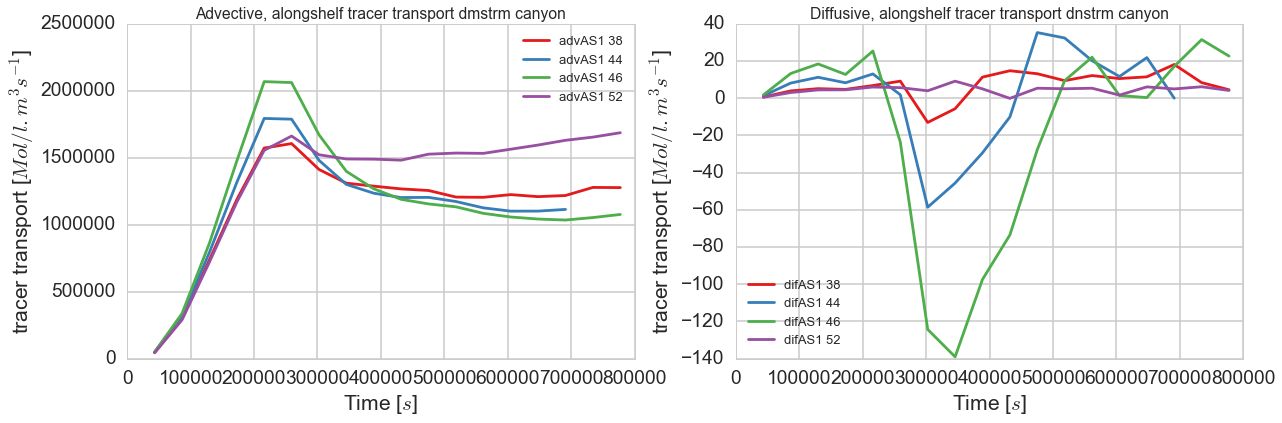

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS1c_flux38).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 38')
(advAS1c_flux44).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 44')
(advAS1c_flux46).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 46')
(advAS1c_flux52).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 52')

(difAS1c_flux38).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 38')
(difAS1c_flux44).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 44')
(difAS1c_flux46).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 46')
(difAS1c_flux52).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 52')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

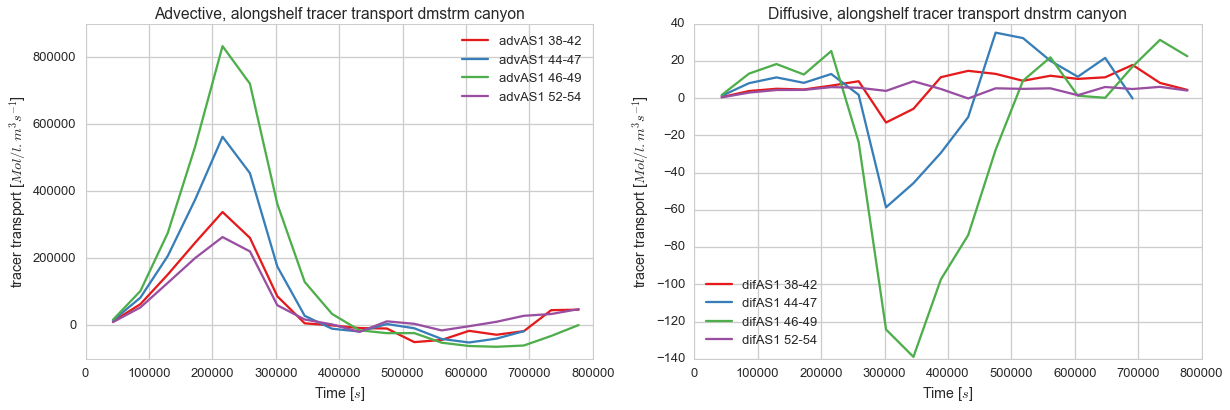

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS1c_flux38-advAS1c_flux42).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 38-42')
(advAS1c_flux44-advAS1c_flux47).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 44-47')
(advAS1c_flux46-advAS1c_flux49).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 46-49')
(advAS1c_flux52-advAS1c_flux54).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS1 52-54')

(difAS1c_flux38-difAS1c_flux42).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 38-42')
(difAS1c_flux44-difAS1c_flux47).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 44-47')
(difAS1c_flux46-difAS1c_flux49).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 46-49')
(difAS1c_flux52-difAS1c_flux54).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS1 52-54')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

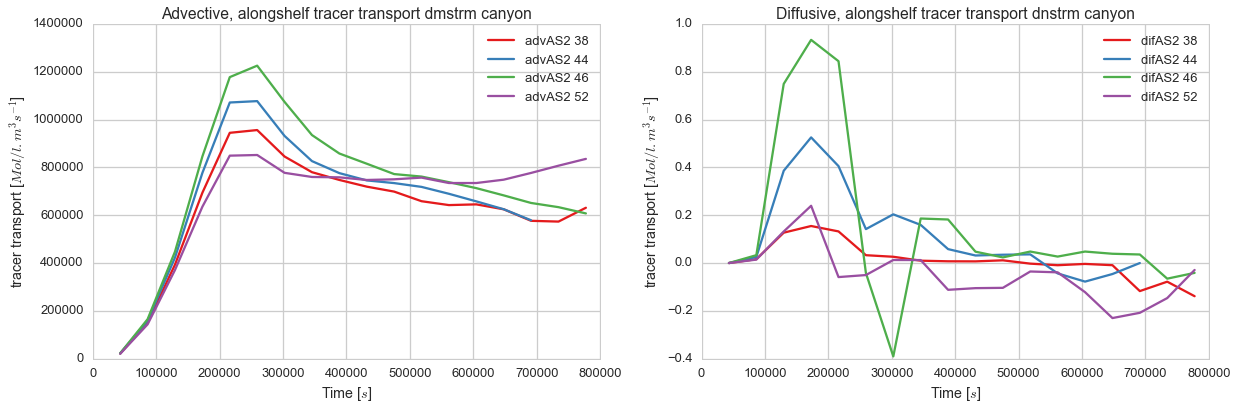

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS2c_flux38).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 38')
(advAS2c_flux44).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 44')
(advAS2c_flux46).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 46')
(advAS2c_flux52).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 52')

(difAS2c_flux38).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 38')
(difAS2c_flux44).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 44')
(difAS2c_flux46).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 46')
(difAS2c_flux52).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 52')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

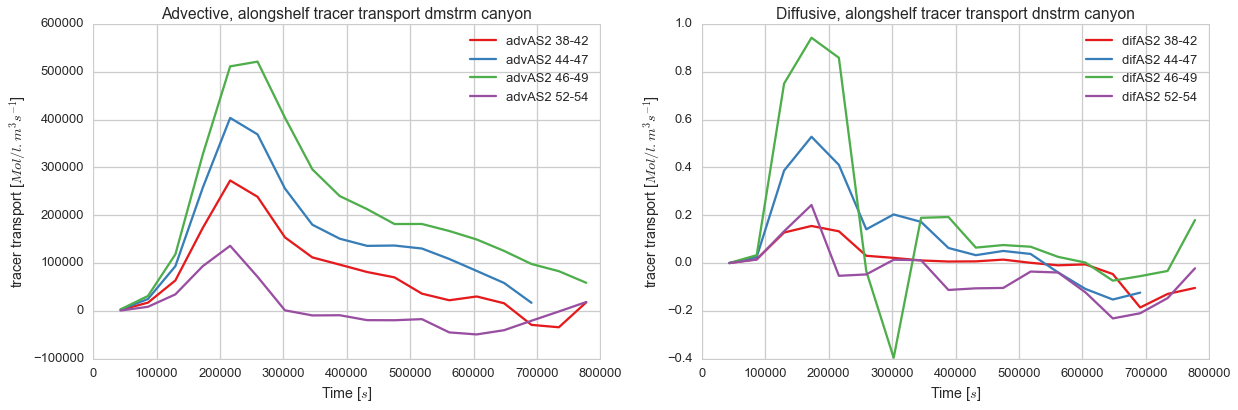

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS2c_flux38-advAS2c_flux42).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 38-42')
(advAS2c_flux44-advAS2c_flux47).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 44-47')
(advAS2c_flux46-advAS2c_flux49).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 46-49')
(advAS2c_flux52-advAS2c_flux54).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS2 52-54')

(difAS2c_flux38-difAS2c_flux42).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 38-42')
(difAS2c_flux44-difAS2c_flux47).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 44-47')
(difAS2c_flux46-difAS2c_flux49).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 46-49')
(difAS2c_flux52-difAS2c_flux54).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS2 52-54')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

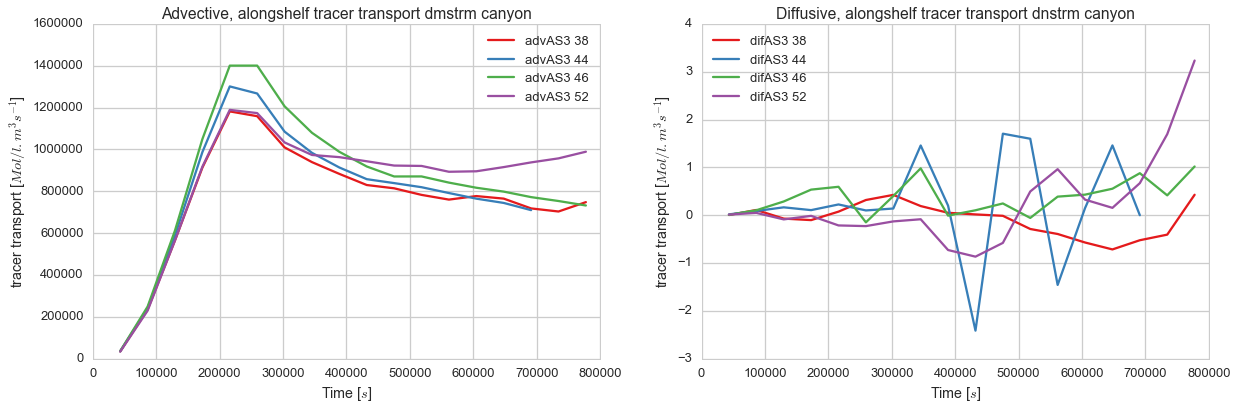

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS3c_flux38).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 38')
(advAS3c_flux44).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 44')
(advAS3c_flux46).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 46')
(advAS3c_flux52).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 52')

(difAS3c_flux38).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 38')
(difAS3c_flux44).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 44')
(difAS3c_flux46).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 46')
(difAS3c_flux52).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 52')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

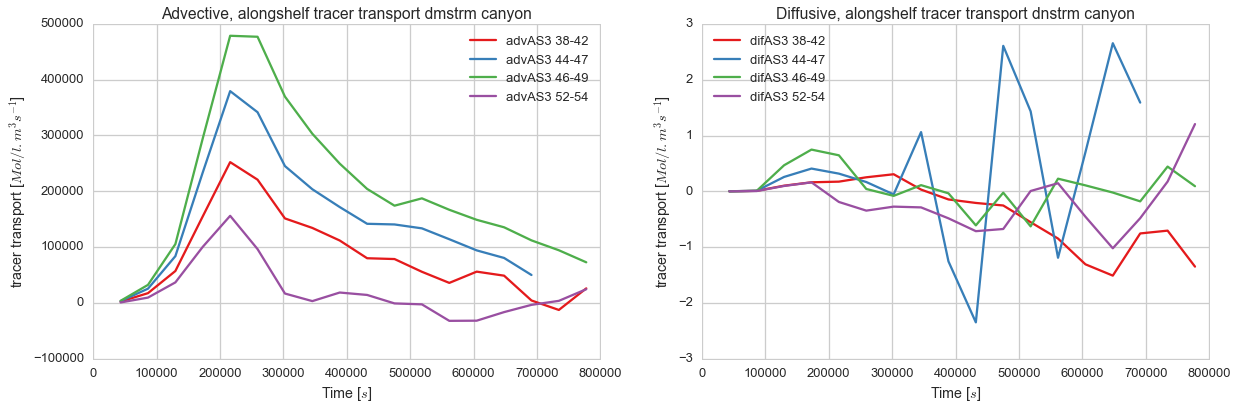

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

(advAS3c_flux38-advAS3c_flux42).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 38-42')
(advAS3c_flux44-advAS3c_flux47).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 44-47')
(advAS3c_flux46-advAS3c_flux49).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 46-49')
(advAS3c_flux52-advAS3c_flux54).sum(dim='Zmd000090').plot(ax=ax[0], label = 'advAS3 52-54')

(difAS3c_flux38-difAS3c_flux42).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 38-42')
(difAS3c_flux44-difAS3c_flux47).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 44-47')
(difAS3c_flux46-difAS3c_flux49).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 46-49')
(difAS3c_flux52-difAS3c_flux54).sum(dim='Zmd000090').plot(ax=ax[1], label = 'difAS3 52-54')


ax[0] = fig_looks(ax[0],title='Advective, alongshelf tracer transport dmstrm canyon')
ax[1] = fig_looks(ax[1],title='Diffusive, alongshelf tracer transport dnstrm canyon')

### Vertical transport at shelf break depth (only within the canyon)


In [9]:
advVR1_flux38 = (unstagger_xarray(flux38.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')
difEVR1_flux38 = (unstagger_xarray(flux38.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')
difIVR1_flux38 = (unstagger_xarray(flux38.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')

advVR1_flux44 = (unstagger_xarray(flux44.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')
difEVR1_flux44 = (unstagger_xarray(flux44.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')
difIVR1_flux44 = (unstagger_xarray(flux44.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')

advVR1_flux46 = (unstagger_xarray(flux46.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')
difEVR1_flux46 = (unstagger_xarray(flux46.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')
difIVR1_flux46 = (unstagger_xarray(flux46.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')


advVR1_flux52 = (unstagger_xarray(flux52.ADVrTr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')
difEVR1_flux52 = (unstagger_xarray(flux52.DFrETr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')
difIVR1_flux52 = (unstagger_xarray(flux52.DFrITr01,'Zld000090').isel(Zld000090=30, X= slice(150,225), Y=slice(227,267))).sum(dim='X')



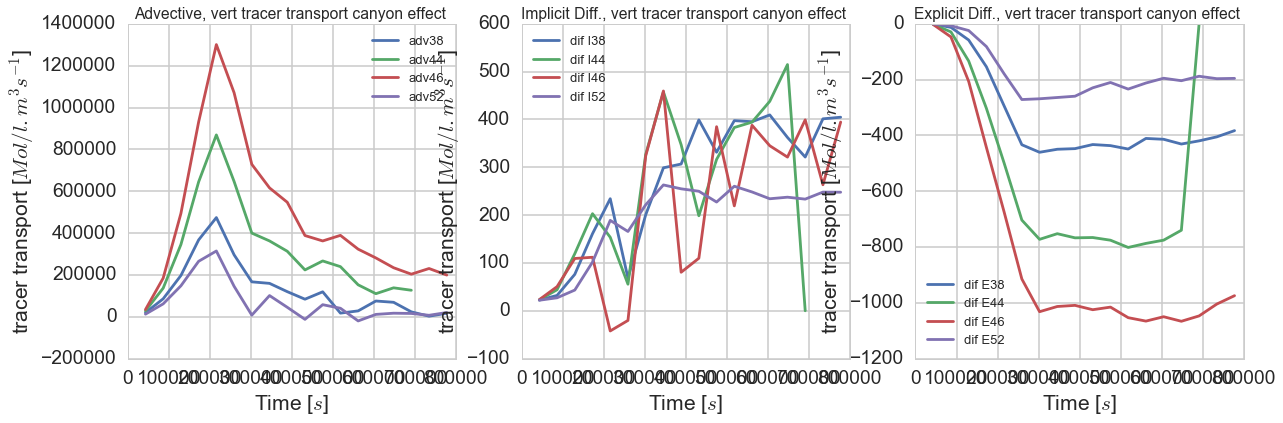

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

(advVR1_flux38).sum(dim='Y').plot(ax=ax[0], label = 'adv38')
(advVR1_flux44).sum(dim='Y').plot(ax=ax[0], label = 'adv44')
(advVR1_flux46).sum(dim='Y').plot(ax=ax[0], label = 'adv46')
(advVR1_flux52).sum(dim='Y').plot(ax=ax[0], label = 'adv52')



(difIVR1_flux38).sum(dim='Y').plot(ax=ax[1], label = 'dif I38')
(difIVR1_flux44).sum(dim='Y').plot(ax=ax[1], label = 'dif I44')
(difIVR1_flux46).sum(dim='Y').plot(ax=ax[1], label = 'dif I46')
(difIVR1_flux52).sum(dim='Y').plot(ax=ax[1], label = 'dif I52')


(difEVR1_flux38).sum(dim='Y').plot(ax=ax[2], label = 'dif E38')
(difEVR1_flux44).sum(dim='Y').plot(ax=ax[2], label = 'dif E44')
(difEVR1_flux46).sum(dim='Y').plot(ax=ax[2], label = 'dif E46')
(difEVR1_flux52).sum(dim='Y').plot(ax=ax[2], label = 'dif E52')


ax[0] = fig_looks(ax[0],title='Advective, vert tracer transport canyon effect ')
ax[1] = fig_looks(ax[1],title='Implicit Diff., vert tracer transport canyon effect ')
ax[2] = fig_looks(ax[2],title='Explicit Diff., vert tracer transport canyon effect ')

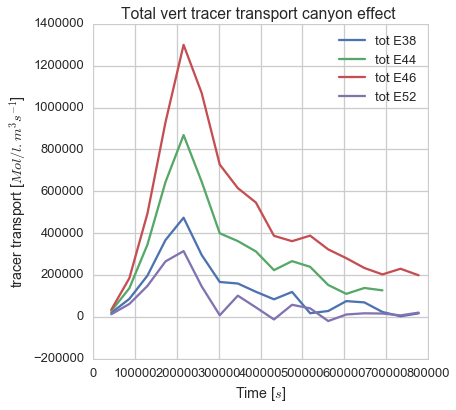

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

(difEVR1_flux38+difIVR1_flux38+advVR1_flux38).sum(dim='Y').plot(ax=ax, label = 'tot E38')
(difEVR1_flux44+difIVR1_flux44+advVR1_flux44).sum(dim='Y').plot(ax=ax, label = 'tot E44')
(difEVR1_flux46+difIVR1_flux46+advVR1_flux46).sum(dim='Y').plot(ax=ax, label = 'tot E46')
(difEVR1_flux52+difIVR1_flux52+advVR1_flux52).sum(dim='Y').plot(ax=ax, label = 'tot E52')


ax = fig_looks(ax,title='Total vert tracer transport canyon effect ')


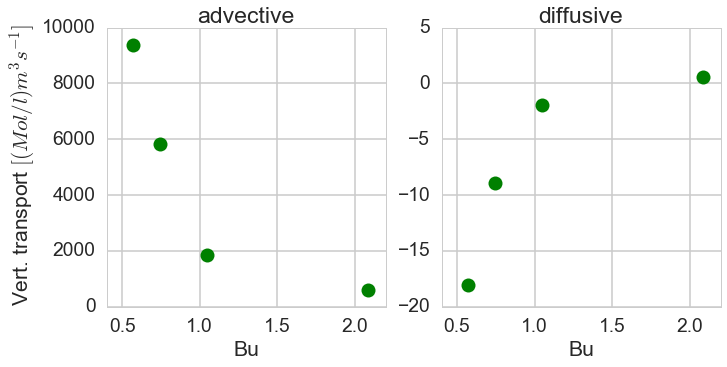

In [13]:
sns.set_context('poster',font_scale=1.2)


datasetsA = [advVR1_flux38,advVR1_flux44,advVR1_flux46,advVR1_flux52]
datasetsD = [difIVR1_flux38+difEVR1_flux38,difIVR1_flux44+difEVR1_flux44,
             difIVR1_flux46+difEVR1_flux46,difIVR1_flux52+difEVR1_flux52]

Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,3.9E-3,3.0E-3,5.5E-3])
f = np.array([9.66E-5,9.66E-5,9.66E-5,4.84E-5])

Bu = (N*Hs)/(f*W)

fig,ax = plt.subplots(1,2,figsize=(11,5))

for data,dataV,ii in zip(datasetsA,datasetsD,range(len(Bu)+1)):
    
    ax[0].plot(Bu[ii],data[6:].mean(),'go',markersize=14)
    ax[1].plot(Bu[ii],dataV[6:].mean(),'go',markersize=14)
    
ax[0].set_ylabel(' Vert. transport $[(Mol/l)m^3s^{-1}]$')
ax[0].set_xlabel('Bu')
ax[0].set_title('advective')


ax[1].set_xlabel('Bu')
ax[1].set_title('diffusive')


plt.plot()

fig.savefig('adv_trac_vert_Nf_new_viscosity.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')
